In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer
from enum import Enum
from typing import List

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [3]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(2,0), (5,1), (6,0), (8,3), (7,2), (8,7), (6,9), (5,8), (2,9), (1,7), (2,4), (4,5), (3,6), (5, 7), (5.5, 3), (2,2), (1,3), (0,1)]
polygon_example_colors = [1, 3, 1, 0, 2, 4, 0, 2, 0, 4, 1, 4, 4, 3, 4, 2, 0, 4]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [4]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [5]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [6]:
def draw_polygon_colors_dict(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in polygon:
        if colors[i]==0:
            points_start.append(i)
        elif colors[i]==1:
            points_end.append(i)
        elif colors[i]==2:
            points_connect.append(i)
        elif colors[i]==3:
            points_divide.append(i)
        elif colors[i]==4:
            points_regular.append(i)

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()

In [7]:
def draw_polygon_triangulation(polygon,tri):
    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)

    for a, b in tri:
        vis.add_line_segment([polygon[a], polygon[b]], color='red')
    vis.show()

In [8]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

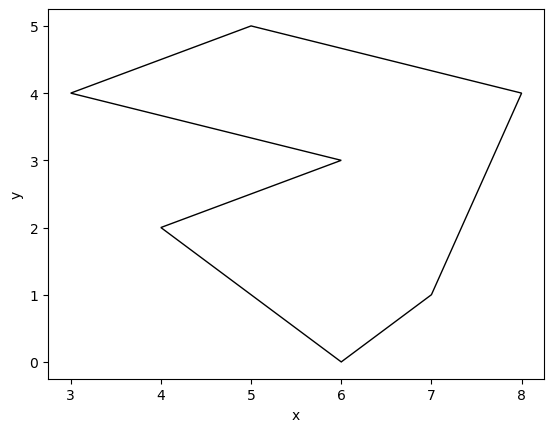

In [9]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

In [10]:

def get_polygon_points(max_x, max_y, points_data):
    %matplotlib tk
    fig = plt.figure()
    fig.set_label('Polygon Points')
    ax = fig.add_subplot(111)
    ax.set_title(f"Please select points for the polygon in counter-clockwise order")
    ax.set_xlim([0, max_x])
    ax.set_ylim([0, max_y])

    cid = None

    def onclick(event):
        plt.plot(event.xdata, event.ydata, 'bo')
        points_data.append((event.xdata, event.ydata))
        ax.annotate(f"{len(points_data)}", xy=(event.xdata, event.ydata))
        fig.canvas.draw()

    def on_close(event):
        fig.canvas.mpl_disconnect(cid)
        plt.close(fig)
        %matplotlib inline
        
    cid = fig.canvas.mpl_connect('button_press_event', onclick)
    cid = fig.canvas.mpl_connect('close_event', on_close)
    plt.show()

In [19]:
polygon = []
get_polygon_points(10, 10, polygon)

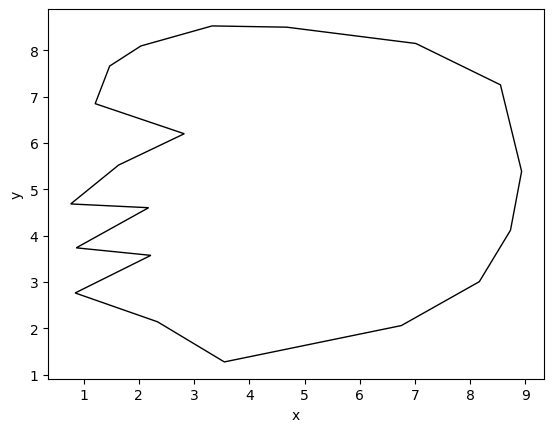

In [20]:
draw_polygon(polygon)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.

In [21]:
def find_min_y_point(polygon):
    N = len(polygon)
    
    i_min_point = 0
    for i in range(1, N):
        if polygon[i][1] < polygon[i_min_point][1]:
            i_min_point = i

    return i_min_point

In [22]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    N = len(polygon)
    i_min_point = find_min_y_point(polygon)
    
    class Direction(Enum):
        UP = 0
        DOWN = 1
        
    dir = Direction.UP
    
    i = (i_min_point + 1) % N
    while i != i_min_point:
        if dir == Direction.UP:
            if polygon[i][1] <= polygon[i-1][1]:
                dir = Direction.DOWN
        elif dir == Direction.DOWN:
            if polygon[i][1] > polygon[i-1][1]:
                return False

        i += 1
        i %= N

    return True

Przeprowadź test poprawności powyższej funkcji.

In [23]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.008s


Sprawdź monotoniczność swojego wielokątu.

In [24]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

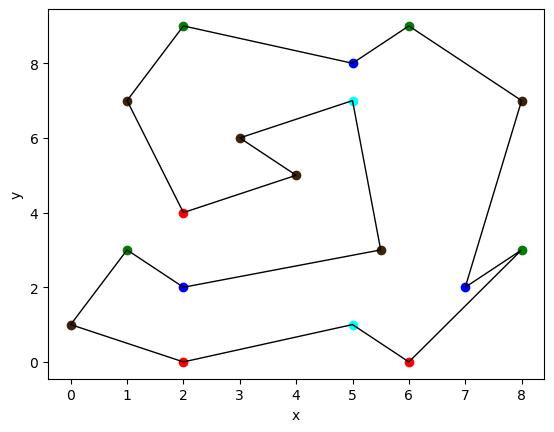

In [25]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [26]:
def det(a ,b, c):
    '''
    Funkcja zwraca wyznacznik macierzy 2x2 iloczynu wektorowego miedzy wektorami ab bc
    '''
    return (b[0] - a[0])*(c[1]-b[1]) - (b[1]-a[1])*(c[0]-b[0])

In [27]:
class Vertex(Enum):
        START = 0
        END = 1
        CONNECT = 2
        DIVIDE = 3
        REGULAR = 4

In [28]:
def classify_point(polygon, T, i):
    N = len(polygon)
    
    angle = det(polygon[i-1], polygon[i], polygon[(i+1)%N])
        
    if angle > 0 and polygon[(i + 1)%N][1] < polygon[i][1] and polygon[i-1][1] < polygon[i][1]:
        T[i] = Vertex.START.value
    elif angle > 0 and polygon[(i + 1)%N][1] > polygon[i][1] and polygon[i-1][1] > polygon[i][1]:
        T[i] = Vertex.END.value
    elif angle < 0 and polygon[(i + 1)%N][1] < polygon[i][1] and polygon[i-1][1] < polygon[i][1]:
        T[i] = Vertex.DIVIDE.value
    elif angle < 0 and polygon[(i + 1)%N][1] > polygon[i][1] and polygon[i-1][1] > polygon[i][1]:
        T[i] = Vertex.CONNECT.value
    else:
        T[i] = Vertex.REGULAR.value

In [29]:
def color_vertex(polygon):
    """

    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    

    N = len(polygon)
    T = [Vertex.REGULAR.value]*N

    i_min_point = find_min_y_point(polygon)
    classify_point(polygon, T, i_min_point)

    i = (i_min_point + 1)%N
    while i != i_min_point:
        classify_point(polygon, T, i)

        i += 1
        i %= N
        

    return T

Przeprowadź test poprawności powyższej funkcji. 

In [30]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.001s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

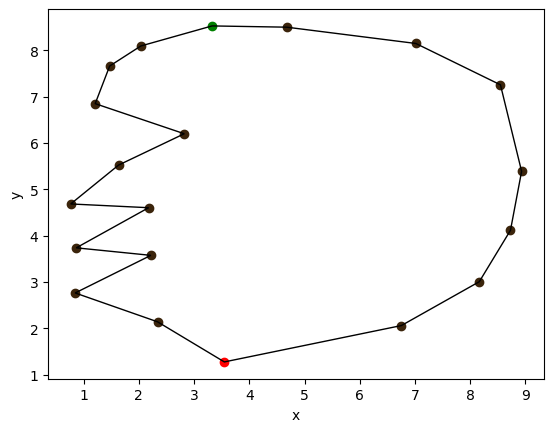

In [31]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

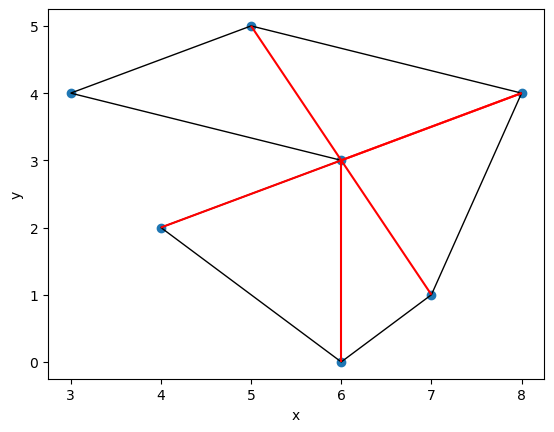

In [32]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

Enum opisujący rozważany łańcuch

In [33]:
class Chain(Enum):
    LEFT = 0
    RIGHT = 1

Funkcja oznaczająca przynależność punktów do danego łańcucha

In [84]:
def get_chains(polygon):
    N = len(polygon)
    i_min_point = find_min_y_point(polygon)
    chains = [-1]*N
    
    class Direction(Enum):
        UP = 0
        DOWN = 1
        
    dir = Direction.UP
    
    i = (i_min_point + 1) % N
    while i != i_min_point:
        if dir == Direction.UP:
            if polygon[i][1] <= polygon[i-1][1]:
                dir = Direction.DOWN
                chains[i] = Chain.LEFT.value
            else:
                chains[i] = Chain.RIGHT.value
        elif dir == Direction.DOWN:
            chains[i] = Chain.LEFT.value

        i += 1
        i %= N
    
    chains[i_min_point]  = Chain.LEFT.value

    return chains

Funkcja sprawdzająca czy sprawdzana krawędź jest "legalna"

In [62]:
def check_triangle(polygon, chains, a, b, c):
    d = det(polygon[a], polygon[b], polygon[c])
    
    if chains[b] == Chain.LEFT.value:
        return d > 10**-14
    else:
        return d < -10**-14

Funkcja dodająca przekątną do zbioru przekątnych, sprawdza czy nie dodaliśmy za dużo przekątnych i czy nie próbujemy dodać krawędzi wielokąta

In [67]:
def add_diagonal(diagonals, n, a, b):
    if abs(a - b) == 1:
        return
    
    if (a == 0 and b == n - 1) or (a == n - 1 and b == 0):
        return
    
    if len(diagonals) < n - 2:
        diagonals.add((a, b))

Właściwa funkcja do obliczania triangulacji, złożoność $\mathcal{O} (n \log n)$

In [75]:
def triangulation(polygon):
    """

    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    N = len(polygon)

    if not is_y_monotonic(polygon):
        return []
    
    chains = get_chains(polygon)
    indices = [i for i in range(N)]
    indices.sort(key=lambda x: polygon[x][1], reverse=True)

    S = [indices[0], indices[1]]

    diagonals = set()

    for i in range(2, N):
        if chains[S[-1]] != chains[indices[i]]:
            while len(S) > 0:
                p = S.pop()
                add_diagonal(diagonals, N, indices[i], p)

            S.append(indices[i - 1])
            S.append(indices[i])
        else:
            p = S.pop()
            while len(S) > 0 and check_triangle(polygon, chains, S[-1], p, indices[i]):
                add_diagonal(diagonals, N, indices[i], S[-1])
                add_diagonal(diagonals, N, indices[i], p)

                p = S.pop()
            
            S.append(p)
            S.append(indices[i])
    
    return list(diagonals)


Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Wielokąt przechowuję jako listę wierzchołków, do sortowania względem kierunku monotoniczności używam tablicę indeksów dających pośrednią warstwę aby nie modyfikować samego wielokąta. Dzięki temu na stosie mogę mieć indeksy dzięki czemu łatwo jest sprawdzić sąsiedztwo wierzchołków - nie generuje to dodatkowej złożoności. <br>
Do zamiatania używam struktury stosu co pozwala na wygodne przechowywanie tymczasowych najlepszych rozwiązań. <br>
Do przechhowywania wyniku triangulacji używam zbioru - struktury opartej o hashtable, operacje przeprowadzane na niej, podobnie jak na słowniku są w złożoności $\mathcal{O}(1)$, dzięki czego w stałej złożoności dostaję gwarancję tego, że nie powielę krawędzi.

Przeprowadź testy poprawności powyższej funkcji.


In [76]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.004s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

[(2, 17), (4, 13), (14, 4), (15, 4), (6, 8), (9, 6), (16, 3), (17, 3), (3, 15), (5, 10), (10, 6), (11, 5), (18, 2), (12, 5), (1, 19), (13, 5), (19, 2)]


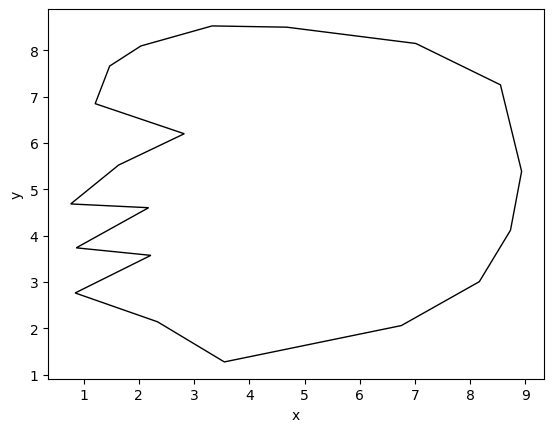

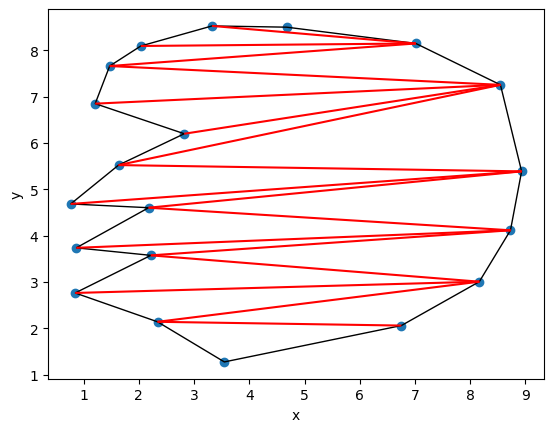

In [77]:
tri = triangulation(polygon)
print(tri)
draw_polygon(polygon)
draw_polygon_triangulation(polygon,tri)

#Wizualizacja działania algorytmu

Poniżej zaimplementowałem wersję wyznaczania triangulacji z dodatkową opcją generowania animacji przedstawiwającej działanie algorytmu.

In [85]:
def add_diagonal_draw(vis : Visualizer, to_remove, diagonals, n, a, b):
    to_remove.append(vis.add_line_segment([polygon[a], polygon[b]], color='red'))
    if abs(a - b) == 1:
        vis.remove_figure(to_remove.pop())
        return
    
    if (a == 0 and b == n - 1) or (a == n - 1 and b == 0):
        vis.remove_figure(to_remove.pop())
        return
    
    if len(diagonals) < n - 2:
        diagonals.add((a, b))
    else:
        vis.remove_figure(to_remove.pop())

In [95]:
def triangulation_draw(polygon):
    vis = Visualizer()
    vis.add_polygon(polygon, fill=False)
    vis.add_point(polygon)
    
    N = len(polygon)

    if not is_y_monotonic(polygon):
        return []
    
    chains = get_chains(polygon)
    indices = [i for i in range(N)]
    indices.sort(key=lambda x: polygon[x][1], reverse=True)

    S = [indices[0], indices[1]]

    diagonals = set()
    to_remove = []
    to_remove_stack = []

    for i in range(2, N):
        if chains[S[-1]] != chains[indices[i]]:
            while len(S) > 0:
                p = S.pop()
                add_diagonal_draw(vis, to_remove, diagonals, N, indices[i], p)

            S.append(indices[i - 1])
            S.append(indices[i])
        else:
            p = S.pop()
            
            to_remove_stack.append(vis.add_line_segment([polygon[indices[i]], polygon[p]], color='red'))
            while len(S) > 0 and check_triangle(polygon, chains, S[-1], p, indices[i]):
                add_diagonal_draw(vis, to_remove, diagonals, N, indices[i], S[-1])
                add_diagonal_draw(vis, to_remove,diagonals, N, indices[i], p)

                p = S.pop()
            
            vis.remove_figure(to_remove_stack.pop())
            S.append(p)
            S.append(indices[i])
    
    return list(diagonals), vis

In [96]:
tri, tri_vis = triangulation_draw(polygon)

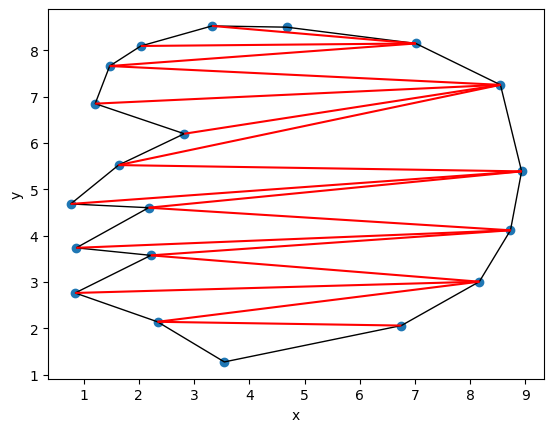

In [97]:
tri_vis.show()

Time: 0.000s


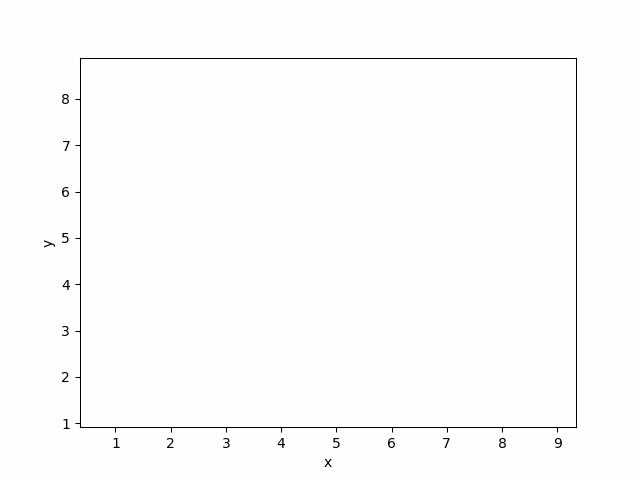

In [98]:
tri_vis.show_gif()